<a href="https://colab.research.google.com/github/happier/models/blob/master/Test_of_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: Getting a Taste of Stock Price History

A price chart is the most direct way to get a taste of your interested stocks or ETFs. For example the following is a price chart of the S&P 500 index provided by Yahoo Finance.

In this Lab, we will acquire the price data of any interested stocks from Yahoo Finance's data API. With some simple data processing, we will be able to plot some basic price charts!

![alt text](https://drive.google.com/uc?id=10otuiqOWvvjzfZEKo3xot7mL5KpjQMKb)

## Getting the Data

In [0]:
# For division
from __future__ import division

# For data manipulation
import pandas as pd
import numpy as np
import datetime as dt

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

In [0]:
# Grab all the closing prices for the tech stock list into one DataFrame
# The price is dividend adjusted price
# Since this is a simple call for non-filled data, we call datareader directly
symbol_list = ['BABA', 'SPY']   # Do check on the ticker, I made the mistake of AAPL -> APPL...
start_date = dt.datetime.strptime('2010-01-01', "%Y-%m-%d")
end_date = dt.date.today()

# Read the data as a pandas dataframe
df = DataReader(symbol_list, 'yahoo', start_date, end_date)['Adj Close']

In [0]:
# Preview the dataframe
df

Symbols,BABA,SPY
Date,,
2010-01-04,NaN,92.788483
2010-01-05,NaN,93.034081
2010-01-06,NaN,93.099579
2010-01-07,NaN,93.492622
2010-01-08,NaN,93.803726
...,...,...
2020-03-09,197.660004,274.230011
2020-03-10,206.389999,288.420013
2020-03-11,198.910004,274.359985


## Plot the Price

In [0]:
RAINBOW_COLORS=['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'black']

In [0]:
# A little data cleaning on missing data
na_price = df[symbol_list].fillna(method='bfill')

In [0]:
# See if the NAs are filled with the IPO day price
na_price.head()

Symbols,BABA,SPY
Date,,
2010-01-04,93.889999,92.788483
2010-01-05,93.889999,93.034081
2010-01-06,93.889999,93.099579
2010-01-07,93.889999,93.492622
2010-01-08,93.889999,93.803726


Text(0, 0.5, 'Price')

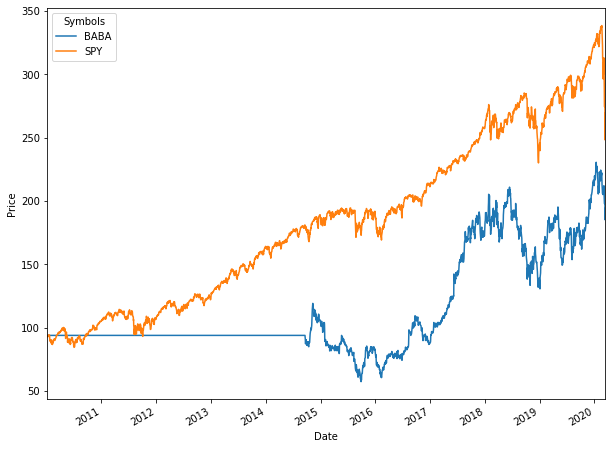

In [0]:
# We can simply plot the data using dataframe.plot()
# Options refer to https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
ax = na_price.plot(figsize=(10,8))
ax.set_ylabel('Price')

## Plot the Return

Most of the time we don't care about the absolute price of the stock, but the relative *return* if we bounght it at the start date

In [0]:
# Normalizing the prices to start at 1 and see relative returns
na_normalized_price = na_price / na_price.iloc[0, :]

Text(0, 0.5, 'Price')

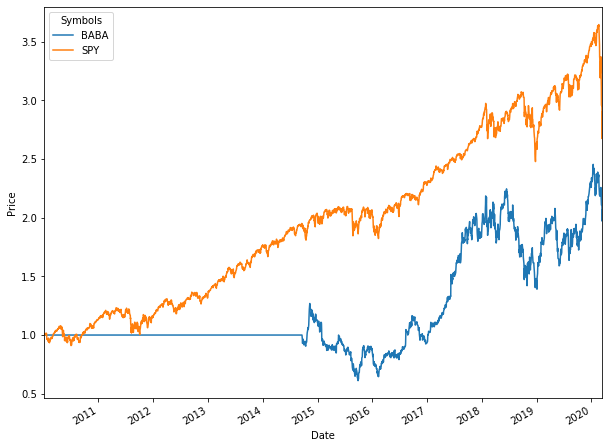

In [0]:
ax1 = na_normalized_price.plot(figsize=(10,8))
ax1.set_ylabel('Price')

In [0]:
na_price_1 = na_price.loc['20140918':]  # Alibaba's IPO date
na_normalized_price_1 = na_price_1 / na_price_1.iloc[0, :]

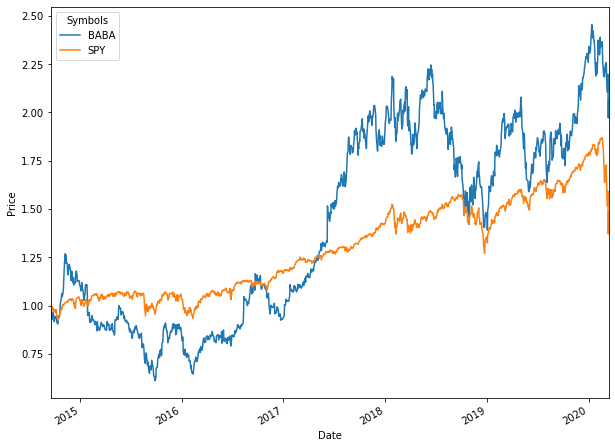

In [0]:
ax2 = na_normalized_price_1.plot(figsize=(10,8))
ax2.set_ylabel('Price')
plt.show()

## Now it's your turn to construct a Python Class to support the above functionalities.

In [0]:
# Provide stock analysis tools
#
class StockAnalysis:

    # Params
    # symbol_list:      list of position symbols
    # start_date:  Start date of the historical data
    # end_date:  End date of the historivcal data
    #
    def __init__(self, symbol_list, start_date, end_date):

        # Put symbol_list into a member variable
        self.symbol_list = symbol_list

        # Set up End and Start times for fetching historic data
        self.end_date = end_date
        self.start_date = start_date

        # Grab all the closing prices for the tech stock list into one DataFrame
        # The price is dividend adjusted price
        # Since this is a simple call for non-filled data, we call datareader directly
        self.df = DataReader(symbol_list, 'yahoo', self.start_date, self.end_date)['Adj Close']

    def plot_price_chart(self, start_date, end_date):
        # Display the prices of chosen [start_date, end_date]
        # Implement below

    def plot_return_curve(self, start_date, end_date):
        # Plot the return curve normalized to the start_date
        # Implement below


In [0]:
"""
Play with the class you built above
For example,
-s "NKX, ^TNX"
-st "2008-01-01"
-et "2020-01-20"
"""

start_date = dt.datetime.strptime('2010-01-01', "%Y-%m-%d")
end_date = dt.datetime.strptime('2020-03-01', "%Y-%m-%d")
SA = StockAnalysis(['AAPL', 'SPY'], start_date, end_date)
SA.plot_price_chart()
SA.plot_return_curve()


